### Problem Statement

Given dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Evaluated machine learning models to predict the likelihood of pet adoption based on the given parameters. Also performed data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.


In [1]:
import pandas as pd

### Data Preparation and Exploration



In [2]:
df = pd.read_csv('pet_adoption_data.csv')

print(df.shape)

df.head()

(2007, 13)


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [3]:
df.drop('pet_id',axis=1,inplace=True)
df.head(3)

,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0


[Text(0, 0, 'Unlikely'), Text(1, 0, 'Likely')]

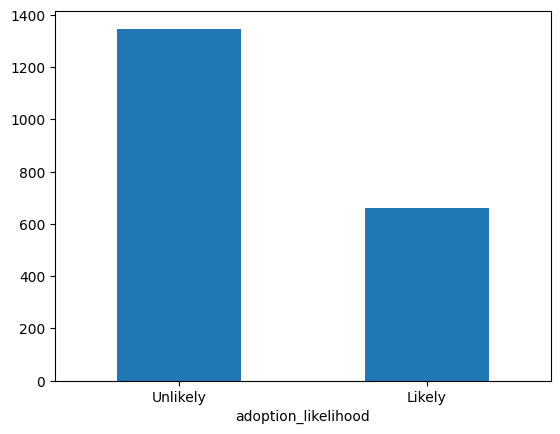

In [4]:
ax = df.adoption_likelihood.value_counts().plot(kind='bar')
ax.set_xticks([0,1])
ax.set_xticklabels(['Unlikely','Likely'],rotation=0)

Text(0.5, 1.0, 'Age Distribution')

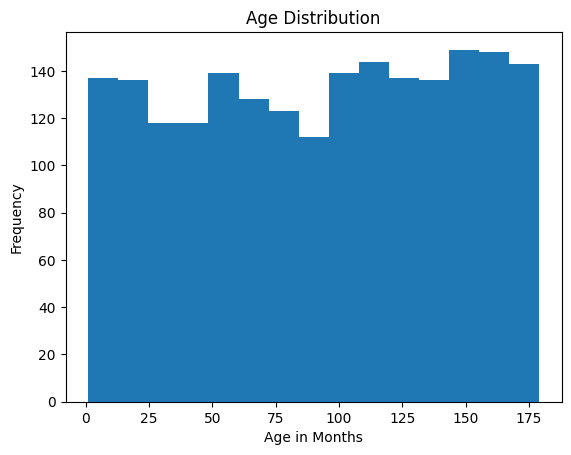

In [5]:
import matplotlib.pyplot as plt
df['age_months'].plot(kind='hist',bins=15)
plt.xlabel("Age in Months")
plt.title("Age Distribution")

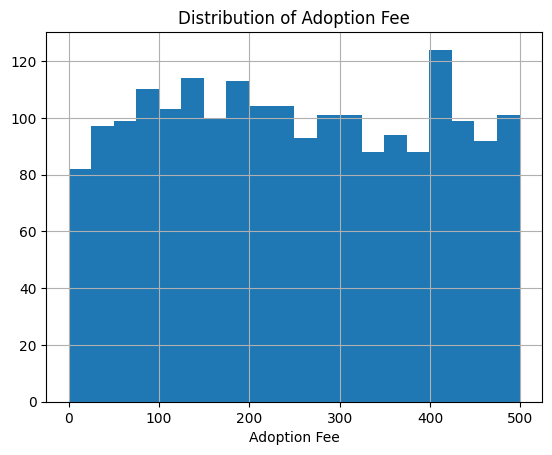

In [6]:
df['adoption_fee'].hist(bins=20)
plt.xlabel("Adoption Fee")
plt.title("Distribution of Adoption Fee")
plt.show()

### Data Encoding and Scaling


In [7]:
df['size'].unique()
df['size'] = df['size'].map({'Small':1,'Medium':2,'Large':3})

In [8]:
df = pd.get_dummies(df,['color','pet_type','breed'],drop_first=True)

In [18]:
df.head(3)

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Cat,...,pet_type_Labrador,pet_type_Parakeet,pet_type_Persian,pet_type_Poodle,pet_type_Rabbit,pet_type_Siamese,breed_Brown,breed_Gray,breed_Orange,breed_White
0,131,3,0.138783,1,0,27,140,0,0,False,...,False,True,False,False,False,False,False,False,True,False
1,73,3,0.520009,0,0,8,235,0,0,False,...,False,False,False,False,True,False,False,False,False,True
2,136,2,0.036514,0,0,85,385,0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler_min = MinMaxScaler()
df['weight_kg'] = scaler_min.fit_transform(df[['weight_kg']])


scaler_std = StandardScaler()
df['adoption_fee'] = scaler_std.fit_transform(df[['adoption_fee']])

In [21]:
df.head(3)

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Cat,...,pet_type_Labrador,pet_type_Parakeet,pet_type_Persian,pet_type_Poodle,pet_type_Rabbit,pet_type_Siamese,breed_Brown,breed_Gray,breed_Orange,breed_White
0,131,3,0.138783,1,0,27,-0.764025,0,0,False,...,False,True,False,False,False,False,False,False,True,False
1,73,3,0.520009,0,0,8,-0.098998,0,0,False,...,False,False,False,False,True,False,False,False,False,True
2,136,2,0.036514,0,0,85,0.951044,0,0,False,...,False,False,False,False,False,False,False,False,True,False


### Model Training Using Decision Tree


In [26]:
X = df.drop('adoption_likelihood',axis=1)
y = df['adoption_likelihood']


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)


print("Accuracy ==> ",model.score(X_test,y_test))


Accuracy ==>  0.8606965174129353


In [28]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

report = classification_report(y_pred,y_test)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       373
           1       0.86      0.75      0.80       230

    accuracy                           0.86       603
   macro avg       0.86      0.84      0.85       603
weighted avg       0.86      0.86      0.86       603



In [30]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[346,  27],
       [ 57, 173]])

<Axes: >

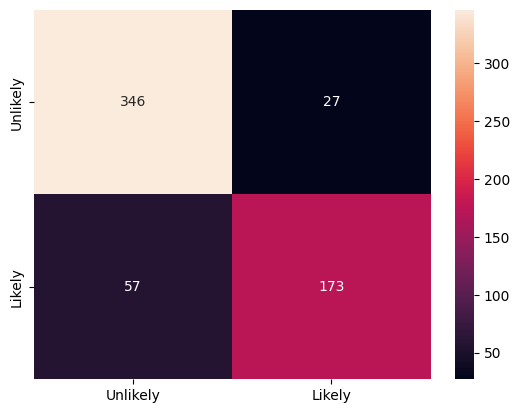

In [34]:
import seaborn as sns
labels = ['Unlikely','Likely']
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)


### Experiment with Hyperparameters in Decision Tree


Custom Accuracy ==>  0.9054726368159204
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       422
           1       0.81      0.90      0.85       181

    accuracy                           0.91       603
   macro avg       0.88      0.90      0.89       603
weighted avg       0.91      0.91      0.91       603



<Axes: >

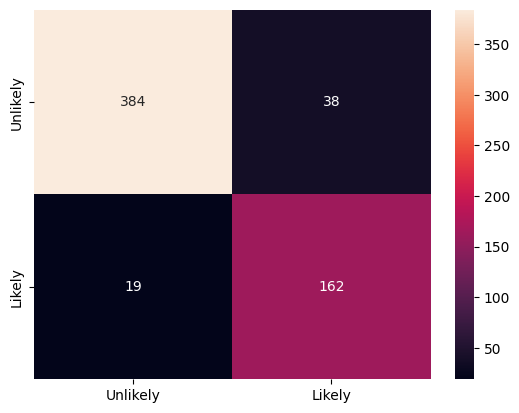

In [38]:
param = {
    'criterion':'entropy',
    'max_depth':5,
    'min_samples_split':10,
    'min_samples_leaf':5
}

model_custom = DecisionTreeClassifier(**param)
model_custom.fit(X_train,y_train)
print("Custom Accuracy ==> ",model_custom.score(X_test,y_test))
print("="*50)
y_pred = model_custom.predict(X_test)
report = classification_report(y_pred,y_test)
print(report)
print("="*50)

cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)

In [43]:
from sklearn.tree import export_text

print(export_text(model_custom,feature_names=X.columns))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 1.50
|   |   |   |--- age_months <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- age_months >  21.50
|   |   |   |   |--- class: 0
|   |   |--- size >  1.50
|   |   |   |--- size <= 2.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  2.50
|   |   |   |   |--- adoption_fee <= -0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  -0.49
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- color_Dog <= 0.50
|   |   |   |--- timein_shelter_days <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- timein_shelter_days >  34.50
|   |   |   |   |--- breed_Brown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- breed_Brown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- color_Dog >  0.50
|   |   |   |--- size <= 2.50
|   